# Random Forest – Credit Card Fraud Detection

**Task:** AI & ML Internship – Task 9  

**Objective:**  
To detect fraudulent credit card transactions using Random Forest, handle class imbalance, compare with a baseline model, and identify important fraud indicators.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

Load Dataset (LOCAL FOLDER)

In [2]:
# Load dataset from local folder
data_path = "Database/creditcard.csv"

df = pd.read_csv(data_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class Imbalance Check

In [3]:
print("Class distribution:")
print(df['Class'].value_counts())

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


Feature & Target Separation

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

Train-Test Split (Stratified)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Baseline Model (Logistic Regression)

In [6]:
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

baseline_pred = baseline_model.predict(X_test)

print("Baseline Logistic Regression Performance:")
print("Precision:", precision_score(y_test, baseline_pred))
print("Recall   :", recall_score(y_test, baseline_pred))
print("F1-score :", f1_score(y_test, baseline_pred))

Baseline Logistic Regression Performance:
Precision: 0.8375
Recall   : 0.6836734693877551
F1-score : 0.7528089887640449


Train Random Forest Model

In [7]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


Random Forest Evaluation

In [8]:
rf_pred = rf_model.predict(X_test)

print("Random Forest Performance:")
print("Precision:", precision_score(y_test, rf_pred))
print("Recall   :", recall_score(y_test, rf_pred))
print("F1-score :", f1_score(y_test, rf_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Performance:
Precision: 0.9411764705882353
Recall   : 0.8163265306122449
F1-score : 0.8743169398907104

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Feature Importance Plot

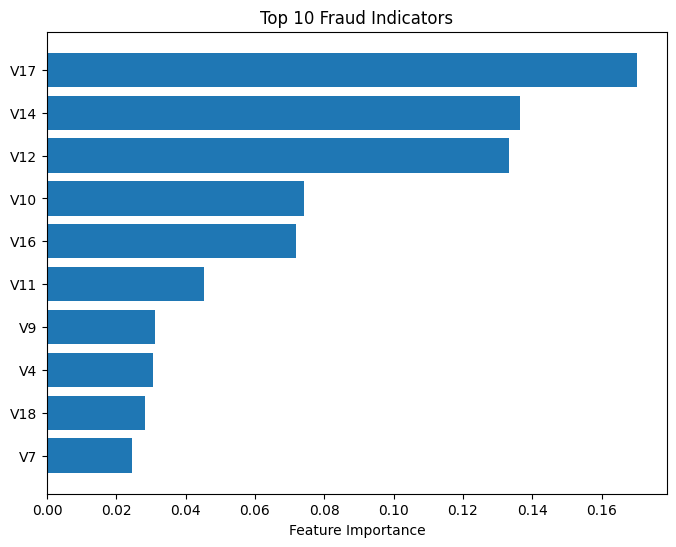

In [9]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Fraud Indicators")
plt.savefig("screenshots/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

Save Best Model

In [10]:
import os

os.makedirs("model", exist_ok=True)

joblib.dump(rf_model, "model/random_forest_fraud_model.pkl")

print("Random Forest model saved successfully.")

Random Forest model saved successfully.


## Interpretation

- Accuracy is avoided due to class imbalance.
- Random Forest outperforms baseline Logistic Regression.
- Feature importance highlights key fraud indicators.
- Ensemble learning improves fraud detection reliability.